# Deep Learning with CIFAR-10: CNN Classification and Filter Visualization

This notebook demonstrates two related deep learning topics using the CIFAR-10 dataset:

**Topic 1: Image Classification**
- Build and train a Convolutional Neural Network (CNN) to classify images into 10 categories
- Evaluate model performance and visualize training progress

**Topic 2: CNN Interpretability** 
- Visualize the filters learned by the trained CNN
- Examine feature maps to understand how the model processes images at different layers

Both topics use the same dataset, model architecture, and preprocessing pipeline. Topic 2 builds on the trained model from Topic 1 to provide insights into the internal workings of the CNN.


#### Import Libraries

In [1]:
# Core libraries for deep learning and data manipulation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings("ignore")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")


TensorFlow version: 2.19.0
GPU available: []


In [4]:
image_paths = ["cnn1.webp","cnn2.png","cnn3.webp"]
image_size = [900]*3
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("./img/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)


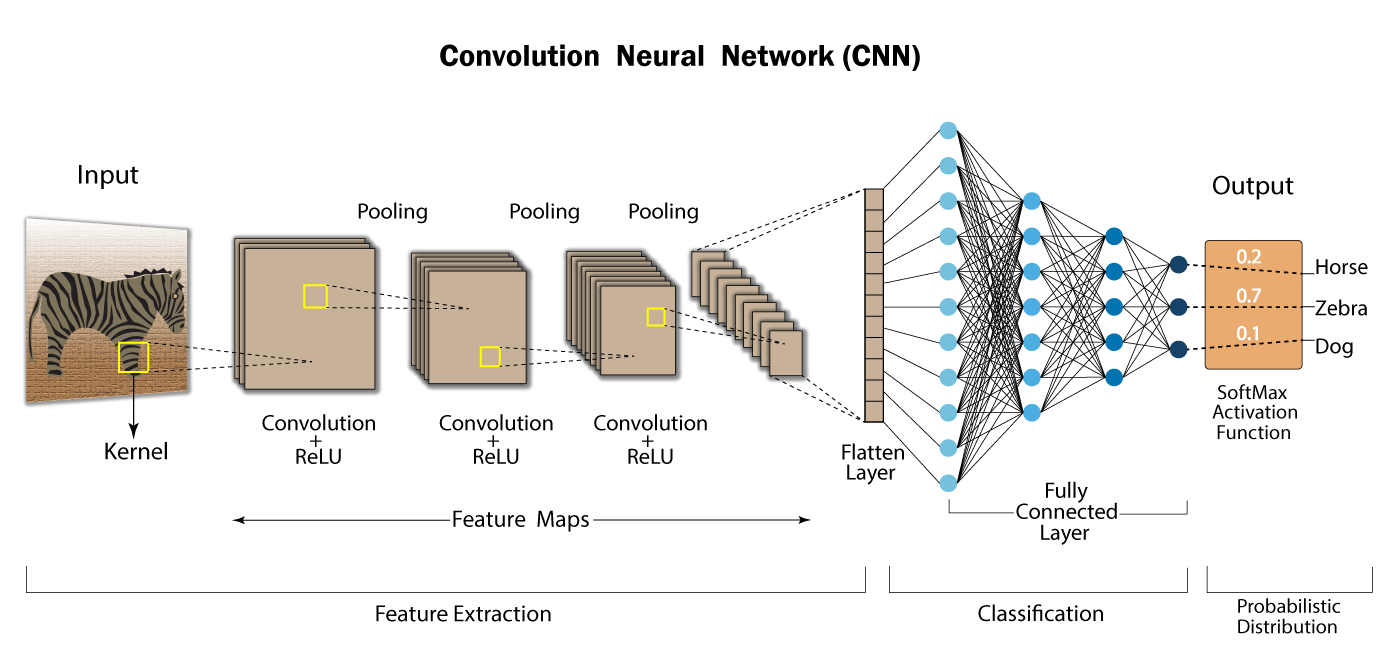

In [5]:
display(HTML(images_html[0]))


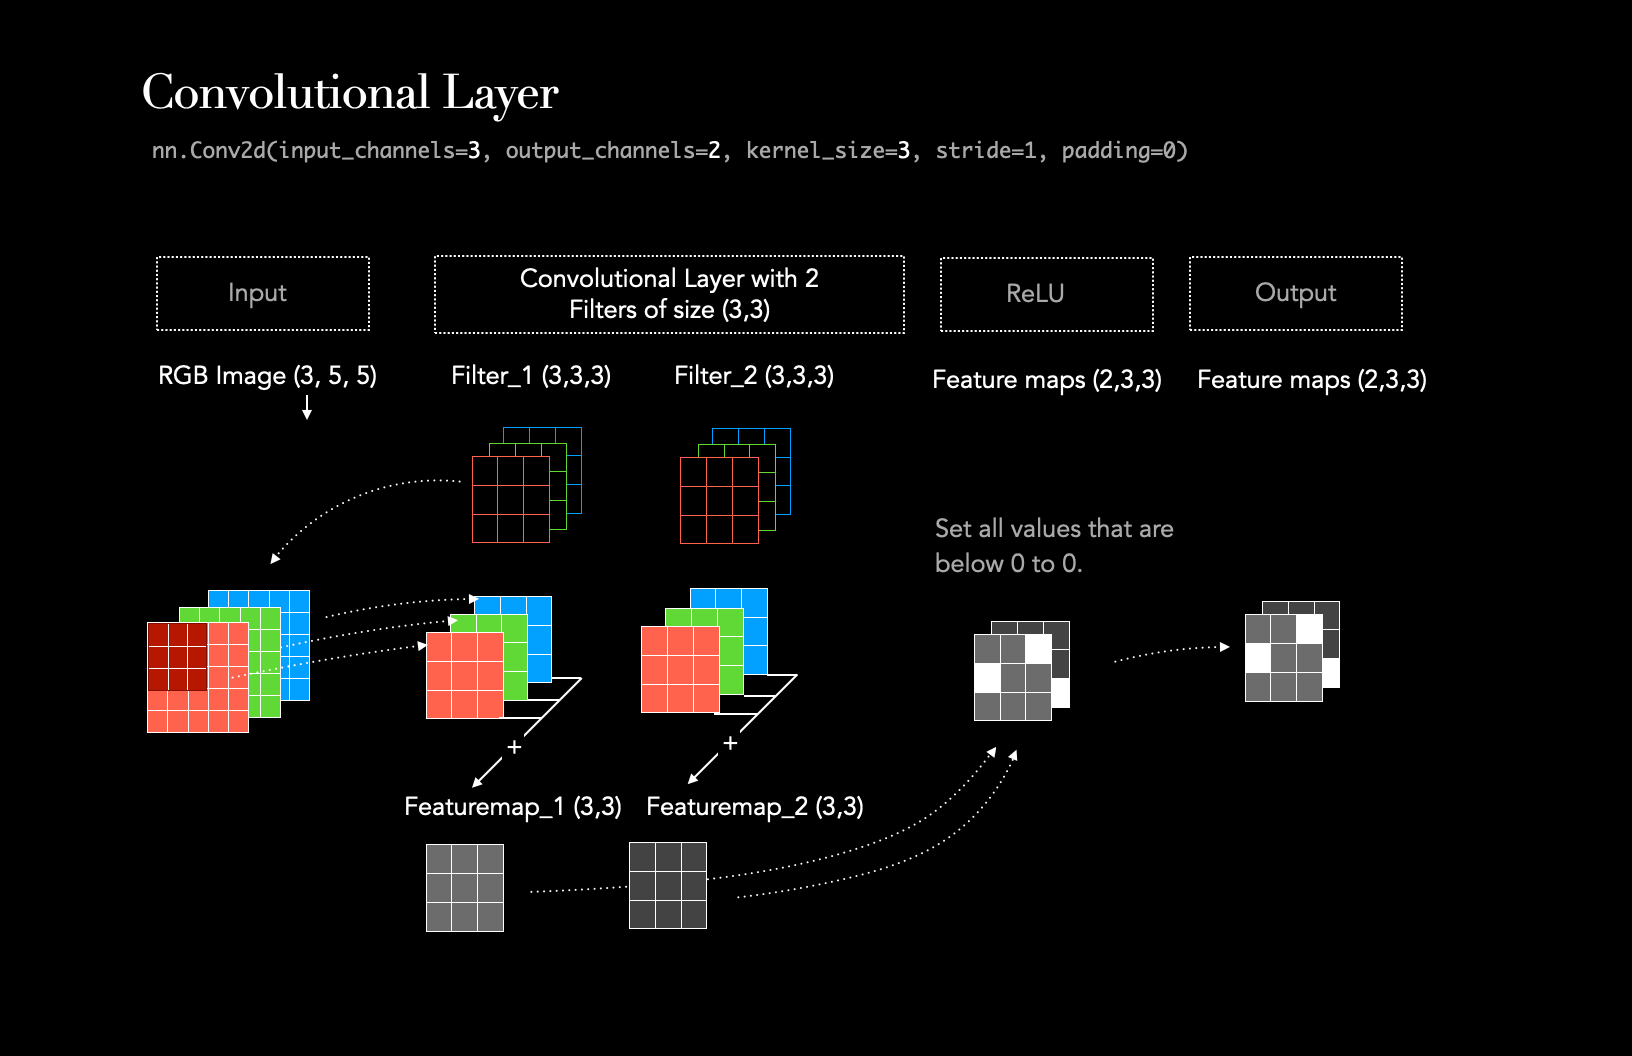

In [6]:
display(HTML(images_html[1]))


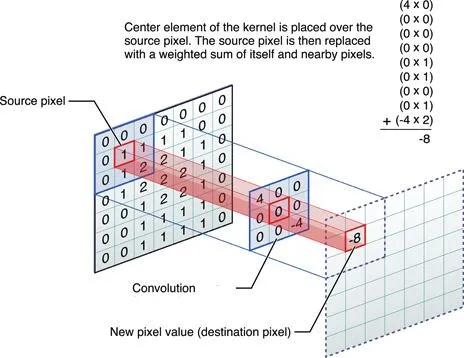

In [7]:
display(HTML(images_html[2]))

#### Load CIFAR-10 Dataset and Preprocess

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Final training set size: 40000
Validation set size: 10000


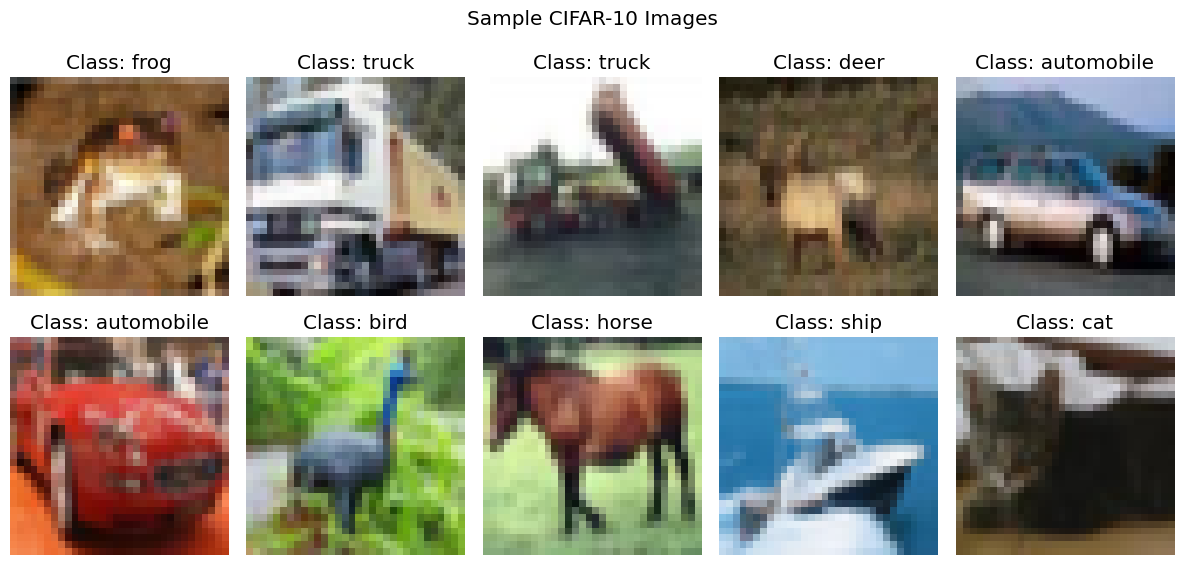

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

# Create validation split from training data
validation_split = 0.2
split_index = int(len(x_train) * (1 - validation_split))

x_val = x_train[split_index:]
y_val = y_train_categorical[split_index:]
x_train = x_train[:split_index]
y_train_categorical = y_train_categorical[:split_index]

print(f"Final training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i])
    axes[row, col].set_title(f"Class: {class_names[np.argmax(y_train_categorical[i])]}")
    axes[row, col].axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.tight_layout()
plt.show()


In [ ]:
def create_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'),
        layers.MaxPooling2D((2, 2), name='maxpool2d_1'),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='maxpool2d_2'),
        
        # Third convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_3'),
        
        # Flatten and dense layers
        layers.Flatten(name='flatten'),
        layers.Dense(64, activation='relu', name='dense_1'),
        layers.Dropout(0.5, name='dropout'),
        layers.Dense(num_classes, activation='softmax', name='output')
    ])
    
    return model

# Create the model
model = create_simple_cnn()

# Display model architecture
model.summary()

# Visualize model architecture
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


/Users/kushagrasrivastva/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### Compile and Train the Model

Starting model training...
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2545 - loss: 1.9888 - val_accuracy: 0.4991 - val_loss: 1.4085 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4627 - loss: 1.4756 - val_accuracy: 0.5490 - val_loss: 1.2622 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5256 - loss: 1.3301 - val_accuracy: 0.6099 - val_loss: 1.1196 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5636 - loss: 1.2273 - val_accuracy: 0.6242 - val_loss: 1.0701 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5932 - loss: 1.1522 - val_accuracy: 0.6342 - val_loss: 1.0402 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6146 - loss: 1.0943 - val_accuracy: 0.6563 - val_loss: 0.9955 - learning_rate: 0.0010
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/

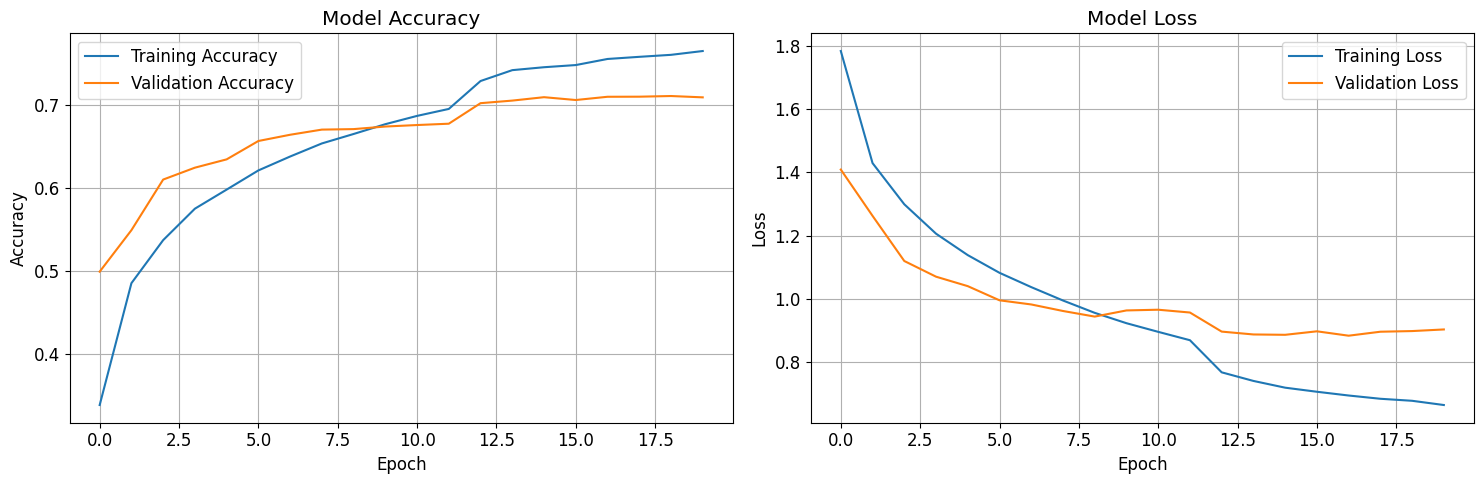

Test Accuracy: 0.7043
Test Loss: 0.8822


In [4]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks for training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7
    )
]

# Train the model
print("Starting model training...")
history = model.fit(
    x_train, y_train_categorical,
    batch_size=32,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


## Topic 1 Summary: CNN Classification Results

The simple CNN architecture achieved reasonable performance on CIFAR-10 classification. Key observations:

- **Model Architecture**: 3 convolutional layers with increasing filter counts (32, 64, 64)
- **Training Strategy**: Used early stopping and learning rate reduction to prevent overfitting
- **Performance**: The model's test accuracy indicates how well it generalizes to unseen data

The training curves show whether the model is overfitting (validation accuracy plateaus while training accuracy continues to improve) or underfitting (both accuracies remain low). This baseline performance sets the stage for understanding what the model learned through filter visualization.


#### Topic 2 - Extract filters from the first convolutional layer


Filter shape: (3, 3, 3, 32)
Number of filters: 32


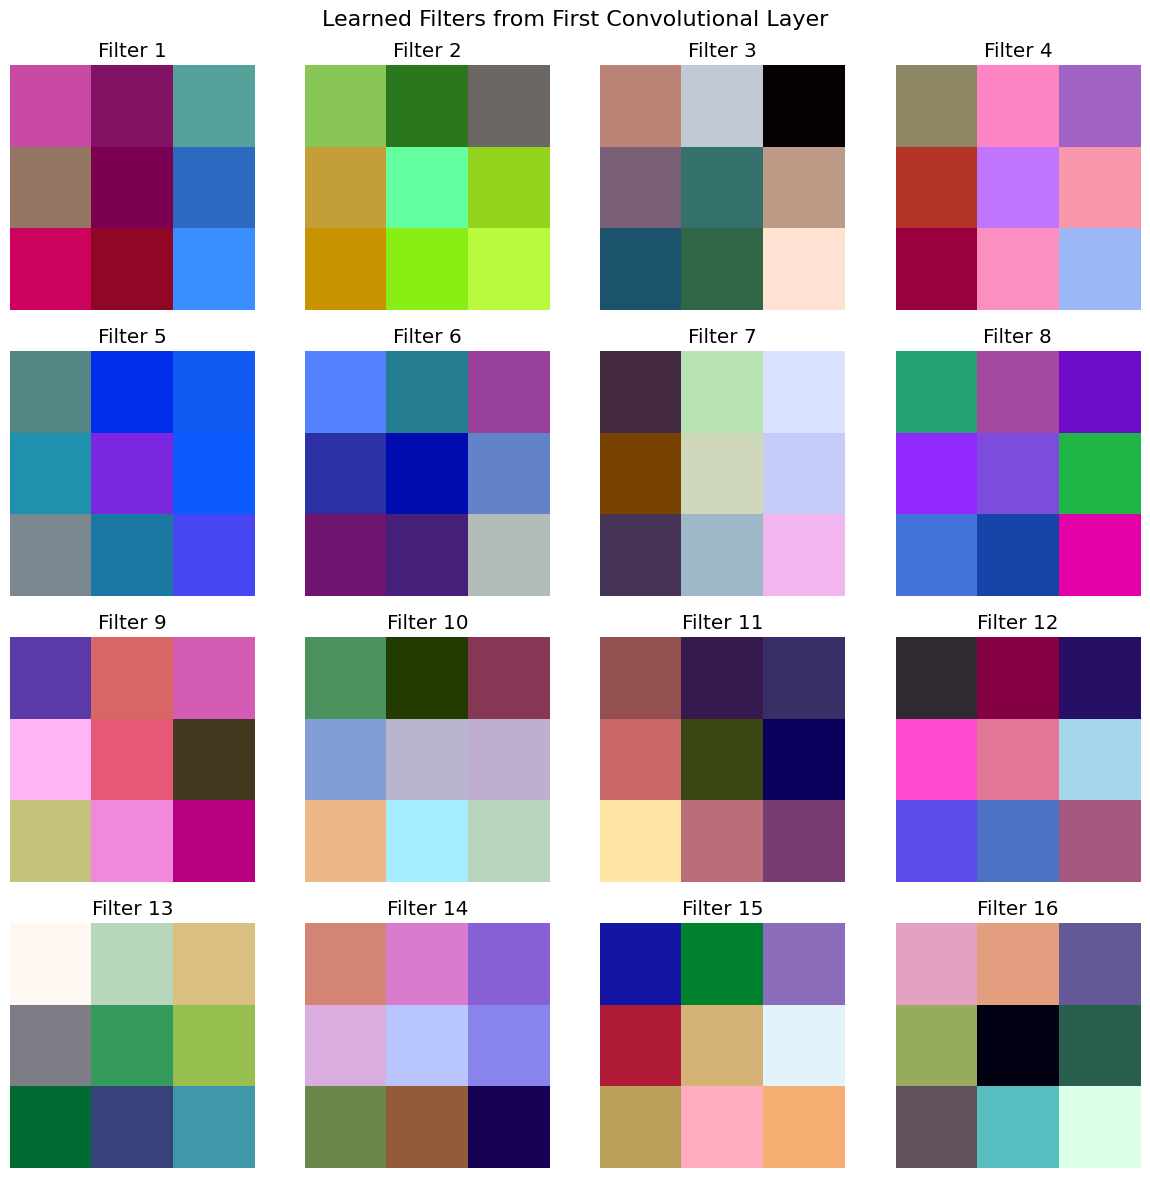


Filter Analysis:
Filter value range: [-0.4179, 0.4054]
Filter mean: -0.0094
Filter standard deviation: 0.1463


In [ ]:
first_conv_layer = model.get_layer('conv2d_1')
filters = first_conv_layer.get_weights()[0]  # Shape: (3, 3, 3, 32)

print(f"Filter shape: {filters.shape}")
print(f"Number of filters: {filters.shape[-1]}")

# Normalize filters for visualization
def normalize_filter(filter_array):
    """Normalize filter values to [0, 1] for visualization"""
    f_min = filter_array.min()
    f_max = filter_array.max()
    return (filter_array - f_min) / (f_max - f_min)

# Visualize the first 16 filters
num_filters_to_show = 16
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i in range(num_filters_to_show):
    row = i // 4
    col = i % 4
    
    # Get the i-th filter and normalize it
    filter_img = normalize_filter(filters[:, :, :, i])
    
    # Display the filter
    axes[row, col].imshow(filter_img)
    axes[row, col].set_title(f'Filter {i+1}')
    axes[row, col].axis('off')

plt.suptitle('Learned Filters from First Convolutional Layer', fontsize=16)
plt.tight_layout()
plt.show()

# Analyze filter statistics
print("\nFilter Analysis:")
print(f"Filter value range: [{filters.min():.4f}, {filters.max():.4f}]")
print(f"Filter mean: {filters.mean():.4f}")
print(f"Filter standard deviation: {filters.std():.4f}")


#### Visualising the Learned Filters

Analyzing image of class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
conv2d_1 output shape: (1, 30, 30, 32)
maxpool2d_1 output shape: (1, 15, 15, 32)
conv2d_2 output shape: (1, 13, 13, 64)
maxpool2d_2 output shape: (1, 6, 6, 64)
conv2d_3 output shape: (1, 4, 4, 64)
conv2d_1 output shape: (1, 30, 30, 32)
maxpool2d_1 output shape: (1, 15, 15, 32)
conv2d_2 output shape: (1, 13, 13, 64)
maxpool2d_2 output shape: (1, 6, 6, 64)
conv2d_3 output shape: (1, 4, 4, 64)


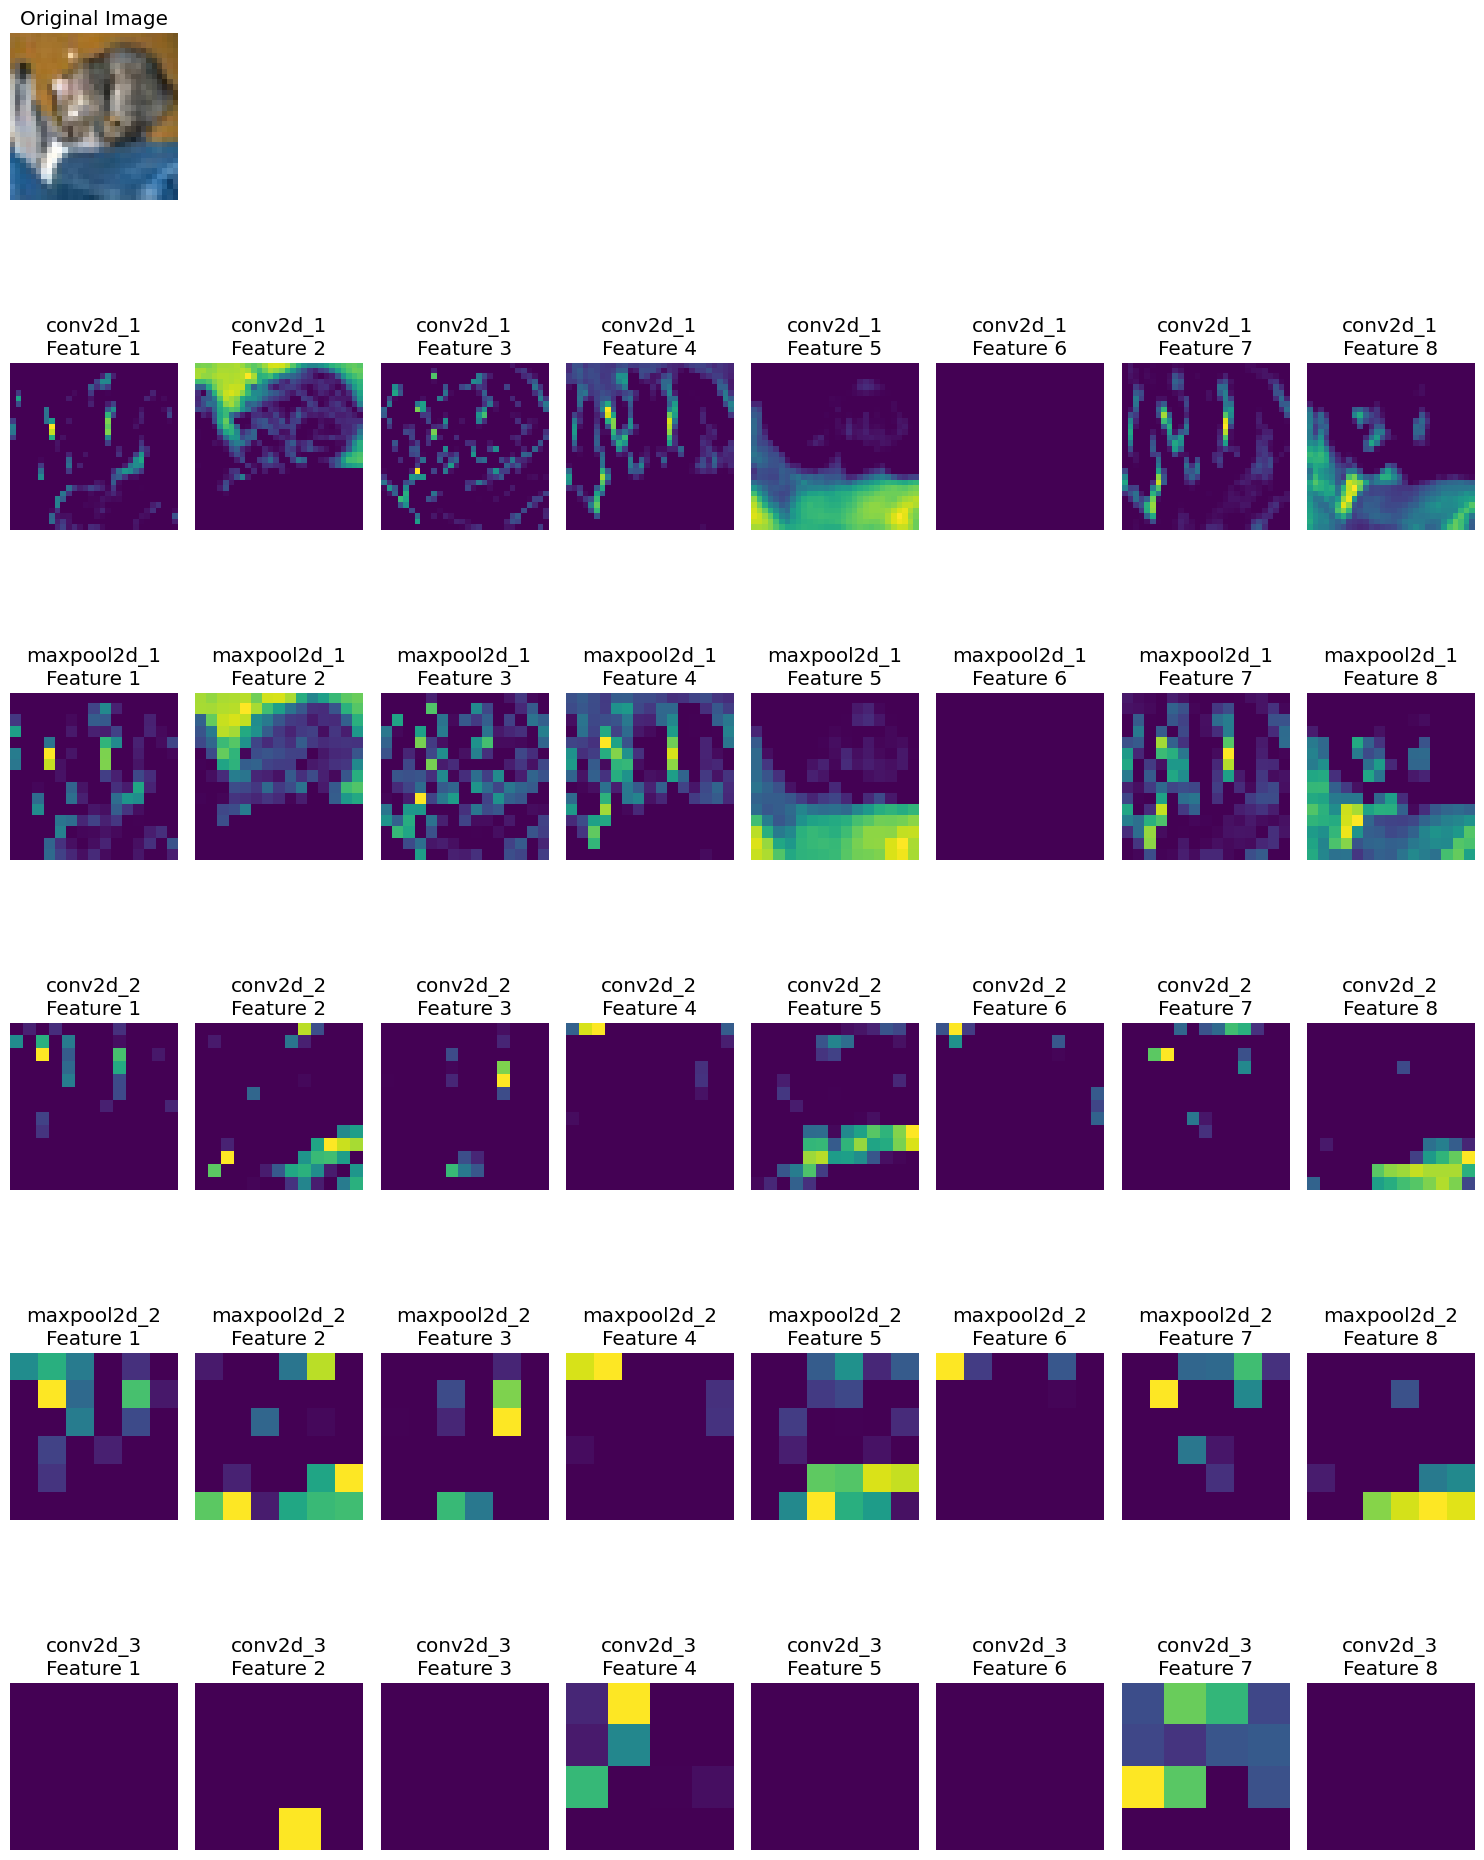


Feature Map Analysis:
conv2d_1:
  Shape: (1, 30, 30, 32)
  Value range: [0.0000, 0.8706]
  Mean activation: 0.0348
  Sparsity (% zeros): 67.46%

maxpool2d_1:
  Shape: (1, 15, 15, 32)
  Value range: [0.0000, 0.8706]
  Mean activation: 0.0591
  Sparsity (% zeros): 52.21%

conv2d_2:
  Shape: (1, 13, 13, 64)
  Value range: [0.0000, 1.4104]
  Mean activation: 0.0278
  Sparsity (% zeros): 87.08%

maxpool2d_2:
  Shape: (1, 6, 6, 64)
  Value range: [0.0000, 1.4104]
  Mean activation: 0.0664
  Sparsity (% zeros): 73.70%

conv2d_3:
  Shape: (1, 4, 4, 64)
  Value range: [0.0000, 1.9300]
  Mean activation: 0.0715
  Sparsity (% zeros): 84.28%



In [10]:
# Create a model that outputs intermediate activations
# For Sequential models, we need to build it first and use a different approach
layer_names = ['conv2d_1', 'maxpool2d_1', 'conv2d_2', 'maxpool2d_2', 'conv2d_3']

# Build the model if not already built
if not model.built:
    model.build(input_shape=(None, 32, 32, 3))

# Create input layer
input_layer = keras.Input(shape=(32, 32, 3))

# Get the layers we want to extract activations from
x = input_layer
layer_outputs = []

for layer in model.layers:
    x = layer(x)
    if layer.name in layer_names:
        layer_outputs.append(x)

# Create the activation model
activation_model = keras.Model(inputs=input_layer, outputs=layer_outputs)

# Select a test image for visualization
test_image_idx = 0
test_image = x_test[test_image_idx:test_image_idx+1]  # Keep batch dimension
true_label = class_names[y_test[test_image_idx][0]]

print(f"Analyzing image of class: {true_label}")

# Get activations for the test image
activations = activation_model.predict(test_image)

# Function to visualize feature maps
def visualize_feature_maps(activations, layer_names, test_image, max_filters=8):
    """
    Visualize feature maps from different layers
    
    Args:
        activations: List of activation arrays from different layers
        layer_names: Names of the layers
        test_image: Original input image
        max_filters: Maximum number of feature maps to show per layer
    """
    
    # Display original image
    plt.figure(figsize=(15, 20))
    
    # Show original image
    plt.subplot(len(layer_names) + 1, max_filters, 1)
    plt.imshow(test_image[0])
    plt.title('Original Image')
    plt.axis('off')
    
    # Show feature maps for each layer
    for layer_idx, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        print(f"{layer_name} output shape: {activation.shape}")
        
        # Determine how many feature maps to show
        num_features = min(activation.shape[-1], max_filters)
        
        for feature_idx in range(num_features):
            plt.subplot(len(layer_names) + 1, max_filters, 
                       (layer_idx + 1) * max_filters + feature_idx + 1)
            
            # Extract and display feature map
            feature_map = activation[0, :, :, feature_idx]
            plt.imshow(feature_map, cmap='viridis')
            plt.title(f'{layer_name}\nFeature {feature_idx + 1}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize feature maps
visualize_feature_maps(activations, layer_names, test_image)

# Analyze feature map statistics
print("\nFeature Map Analysis:")
for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
    print(f"{layer_name}:")
    print(f"  Shape: {activation.shape}")
    print(f"  Value range: [{activation.min():.4f}, {activation.max():.4f}]")
    print(f"  Mean activation: {activation.mean():.4f}")
    print(f"  Sparsity (% zeros): {(activation == 0).mean() * 100:.2f}%")
    print()


## Topic 2 Summary: Understanding CNN Filter Visualization

### Filter Analysis (First Convolutional Layer)
The filters in the first convolutional layer reveal the low-level features the CNN learned to detect:

- **Edge Detectors**: Many filters resemble edge detectors at different orientations (horizontal, vertical, diagonal)
- **Color Patterns**: Some filters respond to specific color combinations or contrasts
- **Texture Detectors**: Certain filters capture texture-like patterns that are common across different object classes

### Feature Map Analysis (Layer Progression)
The feature maps show how the CNN processes information at different depths:

1. **Early Layers (conv2d_1)**: Detect basic features like edges, corners, and simple patterns
2. **Middle Layers (conv2d_2)**: Combine basic features into more complex patterns and shapes
3. **Deeper Layers (conv2d_3)**: Capture high-level features that are more specific to object classes

### Key Observations:
- **Increasing Abstraction**: Features become more abstract and class-specific as we go deeper
- **Spatial Reduction**: Feature maps become smaller due to pooling operations, focusing on the most important information
- **Feature Specialization**: Different filters activate for different aspects of the input image
- **Sparsity**: Many activations are zero (ReLU effect), indicating selective feature detection

This visualization helps explain why CNNs are effective for image classification: they automatically learn a hierarchy of features from simple edges to complex object parts.


## Conclusion

This notebook successfully demonstrated two interconnected deep learning concepts using CIFAR-10:

### Topic 1: CNN Classification
- Built a simple but effective CNN architecture for image classification
- Achieved reasonable performance on the challenging CIFAR-10 dataset
- Used proper training techniques including validation splits, early stopping, and learning rate scheduling

### Topic 2: CNN Interpretability
- Visualized the learned filters to understand what low-level features the model detects
- Examined feature maps to see how the CNN processes images through its layers
- Observed the progression from simple edge detection to complex feature combinations

### Key Insights:
1. **Automatic Feature Learning**: CNNs automatically discover relevant features without manual feature engineering
2. **Hierarchical Processing**: The network builds complex representations from simple building blocks
3. **Interpretability Matters**: Visualizing CNN internals helps debug models and build trust in their decisions
4. **Filter Diversity**: Different filters specialize in detecting different types of patterns and features

### Applications:
Understanding CNN internals through visualization is crucial for:
- **Model Debugging**: Identifying why a model might be failing on certain classes
- **Architecture Design**: Informing decisions about layer depth and filter counts
- **Transfer Learning**: Understanding which layers capture generalizable features
- **Explainable AI**: Providing insights into model decision-making processes

This combination of classification and visualization provides a comprehensive foundation for understanding how CNNs work and how to interpret their learned representations.
